Notebook and data of Ruben Brabenec.

This information, data and code belong to Ruben Brabenec (Helmholtz Zentrum München). 

Disclosure to third parties is prohibited and requires consent.

In [ ]:
#pip install psutil'

In [ ]:
#!pip install --quiet scvi-colab

In [ ]:
#!pip install --quiet scib-metrics

In [ ]:
#from scvi_colab import install

In [ ]:
#!/opt/python/bin/python3.8 -m pip install --upgrade pip

In [ ]:
#pip install ipykernel

In [ ]:
#pip install sfaira

In [ ]:
#pip install --upgrade anndata

In [ ]:
#pip install scanpy

In [ ]:
#pip install scanorama

In [ ]:
#pip install scvi-tools

In [ ]:
#pip install harmony

In [ ]:
#pip install --upgrade numba dask sparse

In [ ]:
#pip install --upgrade scanpy

In [ ]:
#pip install ace_tools 

In [ ]:
#pip install --upgrade torch

In [ ]:
#pip install --upgrade pytorch-lightning

In [ ]:
#!pip uninstall torch -y

In [ ]:
#!pip install --upgrade torch

In [ ]:
#pip install scvi-tools --upgrade

In [5]:
#pip install --upgrade flax

In [ ]:
pip list

# General Settings

In [ ]:
# Settings for the data and parameters
Folder_run_through = '1'  # A unique number for each run; increment or reuse as necessary
Tumor_h5ad = '002-Tumor-AcuteMyeloidLeukemia-AML-VanGalen-2019-RubenBrabenec_TumorProject-processed.h5ad'  # Path to the tumor dataset
Tumor_Type_Name = 'AML'  # Abbreviation for the tumor type (e.g., Acute Myeloid Leukemia)
Name_Tumor_celltype = 'AML cells'  # Name of the tumor cell type in the dataset

In [ ]:
import scvi
from rich import print
from scib_metrics.benchmark import Benchmarker
from scvi.model.utils import mde
from scvi_colab import install

In [ ]:
# Import necessary libraries
import scvi
from rich import print
from scib_metrics.benchmark import Benchmarker
from scvi.model.utils import mde
from scvi_colab import install

import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import gprofiler
import warnings
from rpy2.rinterface import RRuntimeWarning
from rpy2.robjects import pandas2ri
%load_ext rpy2.ipython
import os
from os import listdir
from os.path import isfile, join
import sys
import psutil
import anndata
import scanorama
import scanpy.external as sce

# Suppress warnings related to RRuntime and activate the pandas to R conversion interface
warnings.filterwarnings("ignore", category=RRuntimeWarning)
pandas2ri.activate()

# Set pandas options for displaying large datasets
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Set verbosity level for Scanpy (controls logging output)
sc.settings.verbosity = 3

# Define a custom colormap for gene expression visualization
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7, 0.8, 20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

# Configure figure parameters for Scanpy visualizations
sc.set_figure_params(vector_friendly=True, color_map='Reds',
                     dpi=200, transparent=True, fontsize=14)

# Define a custom color palette for visualizations
palette = ['#3519ED', '#EDFBA8', '#4D2E6A', '#0ECDB4', '#0C23B5', '#92BF0D', '#51F2E4', '#1CB09D', 
           '#BFC1D4', '#A98BF3', '#98D1C6', '#9A5E72', '#B89327', '#6704A5', '#0F64B2', '#A69CF3', 
           '#D97C2E', '#321795', '#7E2649', '#65A813', '#734E0F', '#D14FBC', '#2CFA50', '#83610A',
           '#841032', '#04D8E3', '#8605BA', '#1EF60C', '#602587', '#F9AD1B', '#2BD738', '#C8E239',
           '#46D1BC', '#465A01', '#70C51E', '#924DFB', '#5D28E4', '#712E8D', '#30F465', '#5287E1',
           '#D16B7F', '#B8EF72', '#03B15D', '#4290F3', '#5E9063', '#B0E39F', '#3C6205', '#ACE603', 
           '#2DE57A', '#052B18', '#69BE75', '#8BE509', '#C37041', '#E218BA', '#5AC097', '#A597C4', 
           '#2A13B5', '#823FA7', '#C8F349', '#7C482A', '#A104E5', '#8E3C27', '#1DB457', '#36FDC7',
           '#60A934', '#F43B78', '#74EF61', '#810527', '#6D293F', '#F1A709', '#274F6C', '#104EB5', 
           '#6D02CE', '#B36AE5', '#13F9BA', '#C7281F', '#31572B', '#07D94B', '#B45E18', '#9F73D1',
           '#3CA059', '#4D6B1C', '#3BA785', '#E3084C', '#A61BF4', '#F3D50A', '#640A32', '#FB0D73', 
           '#AD0126', '#279136', '#480EB1', '#634158', '#FD80E5', '#CF26AE', '#046DB9', '#15F6B8', 
           '#1A047C', '#D14826', '#45D160', '#C6039B', '#D9C23F', '#70829B', '#940ECF', '#9FAB37', 
           '#BA84C7', '#68F275', '#C79EA1', '#6E89B7', '#712D6C', '#F51D8C', '#D564E0', '#24EA18', 
           '#459C71', '#23F50B', '#3E57C8', '#6D78F9', '#07EC9F', '#3078C5', '#53EC0A', '#D283E5', 
           '#16039B', '#61E0A8', '#10A659', '#52374A', '#B31EC4', '#254D10', '#D5B0F4', '#A79E35', 
           '#2D0F45', '#562D18', '#ABE562', '#9A0842', '#92165C', '#FCD98A', '#B384DA', '#3CB108', 
           '#2FE04C', '#386CA2', '#423719', '#E540C2', '#C58DE9', '#F6B8E4', '#87592B', '#94D53F', 
           '#4AB5E3', '#B0E96C', '#AD94E6', '#E237B8', '#21F0B9', '#FB9C73']

# Function to play a sound upon encountering an error
from IPython.display import Audio, display
def play_sound(self, etype, value, tb, tb_offset=None):
    """
    Custom function to play a sound when an error occurs.
    """
    self.showtraceback((etype, value, tb), tb_offset=tb_offset)
    display(Audio(url='https://wav-sounds.com/wp-content/uploads/2017/09/Movie-03.wav', autoplay=True))

# Set custom exception handler to play sound upon error
get_ipython().set_custom_exc((Exception,), play_sound)

# Path for storing result files, based on current working directory and folder structure
current_path = os.getcwd()  # Get current working directory
Tumor_File_Path_Overview = current_path + '/'  # Base directory
Tumor_File_Path_Overview = Tumor_File_Path_Overview + 'Subfolder/'  # Subfolder for project
Tumor_File_Path = Tumor_File_Path_Overview + Folder_run_through + '/'  # Final path based on run-through folder


# Prepare Healthy Data - Using SCVI - In Silico Human Atlas

In [ ]:
# Define a list of relevant genes for analysis
genes = ['NTRK1', 'CD33', 'IL3RA', 'CSF1R', 'CD86']
# Output the number of genes
print(f"The number of genes in the list: {len(genes)}")

In [ ]:
# Define the path where healthy datasets are stored
path = '/lustre/groups/labs/marr/qscd01/workspace/ruben.brabenec/adatas/healthy/'

# List of healthy single-cell RNA-seq datasets
# Each entry represents an h5ad file associated with a different organ or study.
# The datasets come from various research projects and were processed specifically for this study.
list_of_healthy_datasets = ['01-1-Brain-Habib-2017-RubenBrabenec_HealthyProject-processed.h5ad',
                            '01-2-Brain_Cerebellum-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '01-3-Brain_TemporalLobe-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '01-4-Brain_SupragranularIntratelencephalicProjectingNeurons-Lein-2020-RubenBrabenec_IllProject-processed.h5ad',
                            '01-5-Brain_PrimaryMotorCortex-Brainmap-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '01-6-Brain_MultipleAreas-Brainmap-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                            
                            '03-1-Eye-Chen-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                            '03-2-Eye-Lukowski-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                            '03-3-Eye-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            
                            '04-1-Oesophagus-Madissoon-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                            '04-9-Oesophagus-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '04-10-Stomach-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                                
                            '04-7-Gut_SmallIntestine-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '04-2-Gut_Colon-James-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '04-3-Gut_Colon_SmallIntestine-Simmons-2021-RubenBrabenec_HealthyProject-processed.h5ad',
                            '04-4-Gut_Colon-Wang-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                            '04-6-Gut_Colon-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '04-5-Gut_Rectum-Wang-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                            '04-8-Gut_Colon_SmallIntestine-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '04-12-Gut_Colon_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '04-13-Gut_SmallIntestine_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                                
                            '04-11-Omentum-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '04-14-Omentum_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                        
                            '05-1-Liver-MacParland-2018-RubenBrabenec_HealthyProject-processed.h5ad',
                            '05-2-Liver-Ramachandran-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                            '05-4-Liver-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                           '05-3-Liver-Andrews-2021-RubenBrabenec_HealthyProject-processed.h5ad',
                            '05-5-GallBladder-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '05-6-Liver-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                           '05-7-Liver_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '06-1-Pancreas-Baron-2016-RubenBrabenec_HealthyProject-processed.h5ad',
                            '06-2-Pancreas-Peng-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                           '06-3-Pancreas-Enge-2017-RubenBrabenec_HealthyProject-processed.h5ad',
                           '06-4-Pancreas-Oudenaarden-2016-RubenBrabenec_HealthyProject-processed.h5ad',
                            '06-5-Pancreas-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                          '06-6-Pancreas-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            
                            '07-1-Spleen-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '07-2-Spleen-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '07-3-Spleen_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '08-1-LymphNode-Kim-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                           '08-2-LymphNode-Butcher-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                           '08-3-Thymus-Park-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '08-4-LymphNode-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '08-5-Thymus-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                           '08-6-LymphNode_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '08-7-Thymus_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '09-6-Trachea-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '09-9-Trachea-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                                
                            '09-1-Lung-Travaglini-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                           '09-2-Lung-Madissoon-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                           '09-3-Lung-Reyfman-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                           '09-4-Lung-Kim-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '09-5-Lung-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                           '09-7-Lung-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                           '09-9-Lung_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                                
                            '09-8-Pleura-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            
                            '10-1-Heart-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                           '10-2_1-Heart-Teichmann-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                           '10-2_2-Heart-Teichmann-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                           '10-2_3-Heart-Teichmann-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '10-3-Heart-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '11-2-Blood-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '11-3-Vasculature-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '11-4-Vasculature-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '11-5-Blood-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '11-6-Blood_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '12-1-BoneMarrow-NameXX-20XX-RubenBrabenec_HealthyProject-processed.h5ad',
                            '12-3-BoneMarrow-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '12-4-BoneMarrow-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '12-5-BoneMarrow_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '13-1-Skin-Cheng-2018-RubenBrabenec_HealthyProject-processed.h5ad',
                            '13-2-Skin-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            
                            '14-1-Muscle-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '14-2-Muscle-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '14-3-Muscle_ImmuneCells-Teichmann-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                           '15-1-Kidney-Steward-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                            '15-2-Kidney-Wilson-2021-RubenBrabenec_HealthyProject-processed.h5ad',
                            '15-3-Kidney-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '15-4-Kidney-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            
                            '16-1-Bladder-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '16-2-Bladder-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '16-3-Ureter-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '17-1-AdrenalGland-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '18-1-ThyroidGland-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            
                            '20-1-Prostate-Strand-2018-RubenBrabenec_HealthyProject-processed.h5ad',
                            '20-2-Prostate-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                           '20-3-Prostate-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '21-2-FallopianTube-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '22-1-Uterus-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '22-3-Uterus-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '22-2-Uterus_Cervix-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            '22-4-Placenta-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            
                            '23-1-Breast-Nakshatri-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                           '23-2-Breast-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '24-1-AdiposeTissue-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                            '24-3-AdiposeTissue-Han-2020-RubenBrabenec_HealthyProject-processed.h5ad',
                            
                            '25-1-SalivaryGland-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '26-1-Tongue-Pisco-2022-RubenBrabenec_HealthyProject-processed.h5ad',
                             
                            '99-2-MultipleOrgans_TCells-Sims-2019-RubenBrabenec_HealthyProject-processed.h5ad',
                            
                            'Ill-001-Brain-Cobos-2020-Alzheimer-AD-RubenBrabenec_IllProject-processed.h5ad',
                           'Ill-002-Brain-Kampmann-2021-Alzheimer-AD-RubenBrabenec_IllProject-processed.h5ad',
                            'Ill-003-Brain-Olah-2020-Alzheimer-AD-RubenBrabenec_IllProject-processed.h5ad',
                            'Ill-004-Brain-Spielmann-2022-Parkinson-MP-RubenBrabenec_IllProject-processed.h5ad',
                            'Ill-005_1-Brain-Lein-2022-Dementia-AD-RubenBrabenec_IllProject-processed.h5ad',
                            'Ill-005_2-Brain-Lein-2022-Dementia-AD-RubenBrabenec_IllProject-processed.h5ad',
                           'Ill-005_3-Brain-Lein-2022-Dementia-AD-RubenBrabenec_IllProject-processed.h5ad',
                            'Ill-005_4-Brain-Lein-2022-Dementia-AD-RubenBrabenec_IllProject-processed.h5ad'
                           ]

In [ ]:
# List of essential observation columns to retain during data cleaning
important_obs = ['Organ', 'Organ_Specific', 'Dataset', 'InternDatasetNumber', 'Dataset_status', 
                 'celltype', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age',
                 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 'original_celltype_3']

# Function to clean the AnnData object by retaining specific metadata and removing unnecessary attributes
def clean_adata(adata, important_obs):
    """
    Cleans an AnnData object by retaining only specified observation columns (obs)
    and removing unused variables and layers.

    Parameters:
    adata : AnnData
        The input AnnData object to clean.
    important_obs : list
        A list of observation column names that should be retained.

    Returns:
    AnnData
        The cleaned AnnData object.
    """
    
    # Ensure unique gene names and cell identifiers
    adata.var_names_make_unique()
    adata.obs_names_make_unique()

    # Retain only the specified observation columns in the .obs dataframe
    adata.obs = adata.obs.loc[:, adata.obs.columns.isin(important_obs)]

    # Remove unnecessary components such as variable attributes, embeddings, and layers
    adata.var.drop(adata.var.columns.difference(['genes']), axis=1, inplace=True)
    del adata.obsm
    del adata.layers

    return adata

# Process each dataset in the list of healthy datasets
for i, dataset in enumerate(list_of_healthy_datasets):
    print(dataset)  # Log the dataset being processed
    
    # Load the AnnData object from file
    adata = sc.read(path + dataset)
    
    # Clean the loaded AnnData object by retaining only relevant metadata
    adata = clean_adata(adata, important_obs)
    
    # Concatenate the cleaned AnnData objects across datasets
    if i == 0:
        adata_healthy = adata.copy()  # Initialize with the first dataset
    else:
        adata_healthy = adata_healthy.concatenate(adata, join='outer', index_unique="_")

    # Free memory after each iteration
    del adata
    process = psutil.Process(os.getpid())

    # Output information about the current size of the concatenated AnnData object
    print('Size of concatenated AnnData object (GB): ', sys.getsizeof(adata_healthy) / (1024 * 1024 * 1024.0))
    print('Current RAM usage (GB): ', process.memory_info().rss / (1024 * 1024 * 1024.0))
    print('Total number of cells in the concatenated dataset: ', len(adata_healthy.obs))
    print('__________________________________________________________________')


In [ ]:
# Convert string-type observations to categorical for optimized storage and faster access
adata_healthy.strings_to_categoricals()

In [ ]:
adata_healthy

In [ ]:
import scanpy as sc
import scvi

# Load the AnnData object containing the healthy dataset
# The dataset is expected to be preprocessed and stored in an h5ad file
adata_healthy = sc.read_h5ad("adata_healthy.h5ad")

# Configure the AnnData object for scVI
# The 'InternDatasetNumber' is used as the batch key, 'celltype' as the label key,
# and 'Patient' is provided as an additional categorical covariate
scvi.model.SCVI.setup_anndata(
    adata_healthy,
    batch_key='InternDatasetNumber',      # Batch variable across datasets
    labels_key='celltype',                # Cell type as the label
    categorical_covariate_keys=['Patient'] # Additional covariate: patient ID
)

# Initialize the scVI model using the configured AnnData object
model = scvi.model.SCVI(adata_healthy)

# Train the scVI model on the data
model.train()

# Extract the latent representation learned by scVI and store it in the 'obsm' slot
adata_healthy.obsm["X_scVI"] = model.get_latent_representation()

# Perform dimensionality reduction using UMAP based on the scVI latent space
sc.pp.neighbors(adata_healthy, use_rep="X_scVI")
sc.tl.umap(adata_healthy)

# Visualize the UMAP embedding, colored by 'InternDatasetNumber', 'celltype', and 'Patient'
sc.pl.umap(adata_healthy, color=["InternDatasetNumber", "celltype", "Patient"])

# Save the latent representation as matrix data, save the original data in a new layer before overwriting
adata_healthy.layers["original_X"] = adata_healthy.X.copy()  # Backup the original X matrix
# Store the scVI latent representation in the main data matrix 'X'
adata_healthy.X = adata_healthy.obsm["X_scVI"].copy()


## Counting Amount of Cells

In [ ]:
# Calculate the number of datasets in the list of healthy datasets.
# Note: The total count is 102 datasets, as some of the original datasets were split into smaller parts due to their large size.
len(list_of_healthy_datasets)

In [ ]:
# List of relevant columns from adata.obs to extract key metadata for each cell
important_obs = ['Organ', 'Organ_Specific', 'Dataset', 'InternDatasetNumber', 'Dataset_status', 
                 'celltype', 'sub_celltype', 'Malignant', 'Patient', 'Patient_Number', 'age',
                 'sex', 'ethnicity', 'health_status', 'original_celltype_1', 'original_celltype_2', 
                 'original_celltype_3']

# Initialize an empty DataFrame to store cell information across all datasets
all_cells_data_df = pd.DataFrame()

# Function to clean the AnnData object by selecting only the important columns from adata.obs
def clean_adata_obs(adata, important_obs):
    # Filter the observation data (adata.obs) to keep only the relevant columns
    cleaned_obs = adata.obs.loc[:, adata.obs.columns.isin(important_obs)]
    return cleaned_obs

# Iterate through each dataset in the list of healthy datasets
for i, dataset in enumerate(list_of_healthy_datasets):
    # Log the dataset being processed
    print(f"Processing dataset {i+1}: {dataset}")
    
    # Load the AnnData object from the specified path
    adata = sc.read(path + dataset)
    
    # Clean the AnnData object to retain only relevant information in adata.obs
    cleaned_obs = clean_adata_obs(adata, important_obs)
    
    # Add the dataset name as a new column to track which dataset the cells came from
    cleaned_obs['Dataset'] = dataset
    
    # Append the cleaned data from this dataset to the overall DataFrame
    all_cells_data_df = pd.concat([all_cells_data_df, cleaned_obs], axis=0)
    
    # Release memory associated with the AnnData object after processing
    del adata
    
    # Check and log current memory usage in GB after processing each dataset
    process = psutil.Process(os.getpid())
    print(f"Memory usage after processing (GB): {process.memory_info().rss / (1024 * 1024 * 1024.0):.2f}")
    
    # Log the current number of cells processed so far
    print(f"Total number of cells processed: {len(all_cells_data_df)}")
    print('__________________________________________________________________')

In [ ]:
all_cells_data_df[:3]

In [ ]:
all_cells_data_df.to_csv('cell_counts_per_dataset_and_organ.csv', index=True)

In [ ]:
import seaborn as sns

# List of relevant columns from the DataFrame for which we will plot distributions
important_obs = ['Organ'] 

# Set modern plot styles for better presentation
sns.set(style="whitegrid", context="talk")  # Larger context for a more modern look
sns.set_palette("muted")  # Muted color palette for clean visuals

# Adjust plot layout and appearance for publication-quality figures
rcParams['axes.titleweight'] = 'bold'  # Bold font for axis titles
rcParams['axes.labelweight'] = 'bold'  # Bold font for axis labels
rcParams['axes.titlepad'] = 20  # Space between the title and the plot
rcParams['axes.labelpad'] = 10  # Space between axis labels and the plot
rcParams['xtick.major.pad'] = 10  # Padding for x-axis tick labels
rcParams['ytick.major.pad'] = 10  # Padding for y-axis tick labels

# Initialize an empty DataFrame to store value counts for CSV export
all_value_counts = pd.DataFrame()

def plot_column_distribution(df, column_name):
    """
    Plots a sorted bar chart for a specific column in the DataFrame
    and saves the distribution plot and value counts as CSV.
    """
    plt.figure(figsize=(12, 8))  # Increase figure size for readability
    
    # Calculate value counts and sort them in descending order
    value_counts = df[column_name].value_counts().sort_values(ascending=False)
    
    # Plot the value counts with bars, adding spacing and setting bar width
    ax = sns.barplot(x=value_counts.values, y=value_counts.index, palette='muted', 
                     edgecolor='0.2', linewidth=2.5, dodge=False, width=0.7)
    
    # Add count labels to the end of each bar with some space from the bar
    for i, (count, label) in enumerate(zip(value_counts.values, value_counts.index)):
        ax.text(count + 0.05 * count, i, f'{count:,}', va='center', fontsize=12, color='black', weight='bold')
    
    # Set plot title and axis labels with custom font sizes and padding
    plt.title(f'Distribution of {column_name}', fontsize=20, fontweight='bold', pad=30)
    plt.xlabel('Absolute Count', fontsize=16, labelpad=15)
    plt.ylabel(column_name, fontsize=16, labelpad=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Ensure x-axis shows numbers in standard format (no scientific notation)
    ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
    
    # Adjust layout to provide more space between bars and edges
    plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.1)
    
    # Remove top and right spines for cleaner visuals
    sns.despine(left=True, bottom=True)
    
    # Save the plot as a PNG file with high resolution
    plt.tight_layout()
    plt.savefig(f'{column_name}_distribution.png', dpi=300)
    plt.show()
    
    # Save the value counts as a DataFrame and export as CSV
    value_counts_df = value_counts.reset_index()
    value_counts_df.columns = [column_name, 'Count']  # Rename columns for clarity
    
    # Export the value counts to a CSV file
    value_counts_df.to_csv(f'{column_name}_value_counts.csv', index=False)
    
    # Return the DataFrame for potential concatenation with other columns
    return value_counts_df

# Apply the plotting function to each column in `important_obs`
for column in important_obs:
    if column in all_cells_data_df.columns:
        value_counts_df = plot_column_distribution(all_cells_data_df, column)
        
        # Concatenate the new value counts with the overall DataFrame for CSV export
        all_value_counts = pd.concat([all_value_counts, value_counts_df], axis=1)

# Save the combined value counts of all columns as a single CSV
all_value_counts.to_csv('all_columns_value_counts.csv', index=False)

print("Plots and CSV files have been successfully saved.")


In [ ]:
# Define the column that identifies patients in the dataset
patient_column = 'Patient'

def count_unique_patients(df, patient_column):
    
    # Count the number of unique patients
    unique_patients = df[patient_column].nunique()
    
    # Output the count of unique patients
    print(f'Number of unique patients/donors: {unique_patients}')
    
    return unique_patients


Anzahl der einzigartigen Patienten/Spender: 344


# ???

# Analysis Tumor Data

In [ ]:
# Load the tumor AnnData object
# The dataset is assumed to be preprocessed and stored in an h5ad file
adata_tumor = sc.read(Tumor_h5ad)

# Store gene names in the variable (var) metadata for easier reference
adata_tumor.var['genes'] = adata_tumor.var.index

# Subset the data to include only the genes of interest (final_druggable genes)
# This creates a mask to select only genes that are in the 'final_druggable' list
ix = np.isin(adata_tumor.var['genes'], genes)
adata_tumor = adata_tumor[:, ix].copy()

# Filter observation (obs) columns to retain only those considered important
# Columns not in 'important_obs' are removed from the obs metadata
adata_obs_list = adata_tumor.obs.columns.tolist()
for obs_value in adata_obs_list:
    if obs_value not in important_obs:
        del adata_tumor.obs[obs_value]

# Convert string-type observation columns to categorical
adata_tumor.strings_to_categoricals()

In [ ]:
adata_tumor.obs['celltype'].value_counts()

In [ ]:
adata_tumor.obs['Patient'].value_counts()

In [ ]:
adata_tumor.obs['original_celltype_1'].value_counts()

In [ ]:
# Define a list of genes of interest for further analysis
gene_list_2 = ['NTRK1']

In [ ]:
sc.pl.dotplot(adata_tumor, gene_list_2, groupby=['Patient'], dendrogram=False,
              vmax=0.01, vmin=0.00001, swap_axes=True, dot_min=0.00001, dot_max=0.01, use_raw=False)

In [ ]:
# Subset the AnnData object to include only malignant cells
adata_malignant = adata_tumor[adata_tumor.obs['Malignant'] == 'Malignant']


sc.pl.dotplot(adata_malignant, gene_list_2, groupby=['Patient'], dendrogram=False,
              vmax=0.01, vmin=0.00001, swap_axes=True, dot_min=0.00001, dot_max=0.01, use_raw=False)

sc.pl.dotplot(adata_malignant, gene_list_2, groupby=['original_celltype_1'], dendrogram=False,
              vmax=0.01, vmin=0.00001, swap_axes=True, dot_min=0.00001, dot_max=0.01, use_raw=False)

In [ ]:
adata_malignant.obs['celltype'].value_counts()

In [ ]:
adata_malignant.obs['Patient'].value_counts()

In [ ]:
adata_malignant.obs['original_celltype_1'].value_counts()

In [ ]:
# Subset the AnnData object to include only cells classified as 'HSC' or 'HSC-like'
adata_hsc = adata_tumor[adata_tumor.obs['original_celltype_1'].isin(['HSC', 'HSC-like'])]

sc.pl.dotplot(adata_hsc, gene_list_2, groupby=['Patient'], dendrogram=False,
              vmax=0.1, vmin=0.00001, swap_axes=True, dot_min=0.00001, dot_max=0.1, use_raw=False)

In [ ]:
adata_hsc.obs['celltype'].value_counts()

In [ ]:
adata_hsc.obs['Patient'].value_counts()

In [ ]:
adata_hsc.obs['original_celltype_1'].value_counts()

## Plotting Number of Cells per Patient by Cell Type

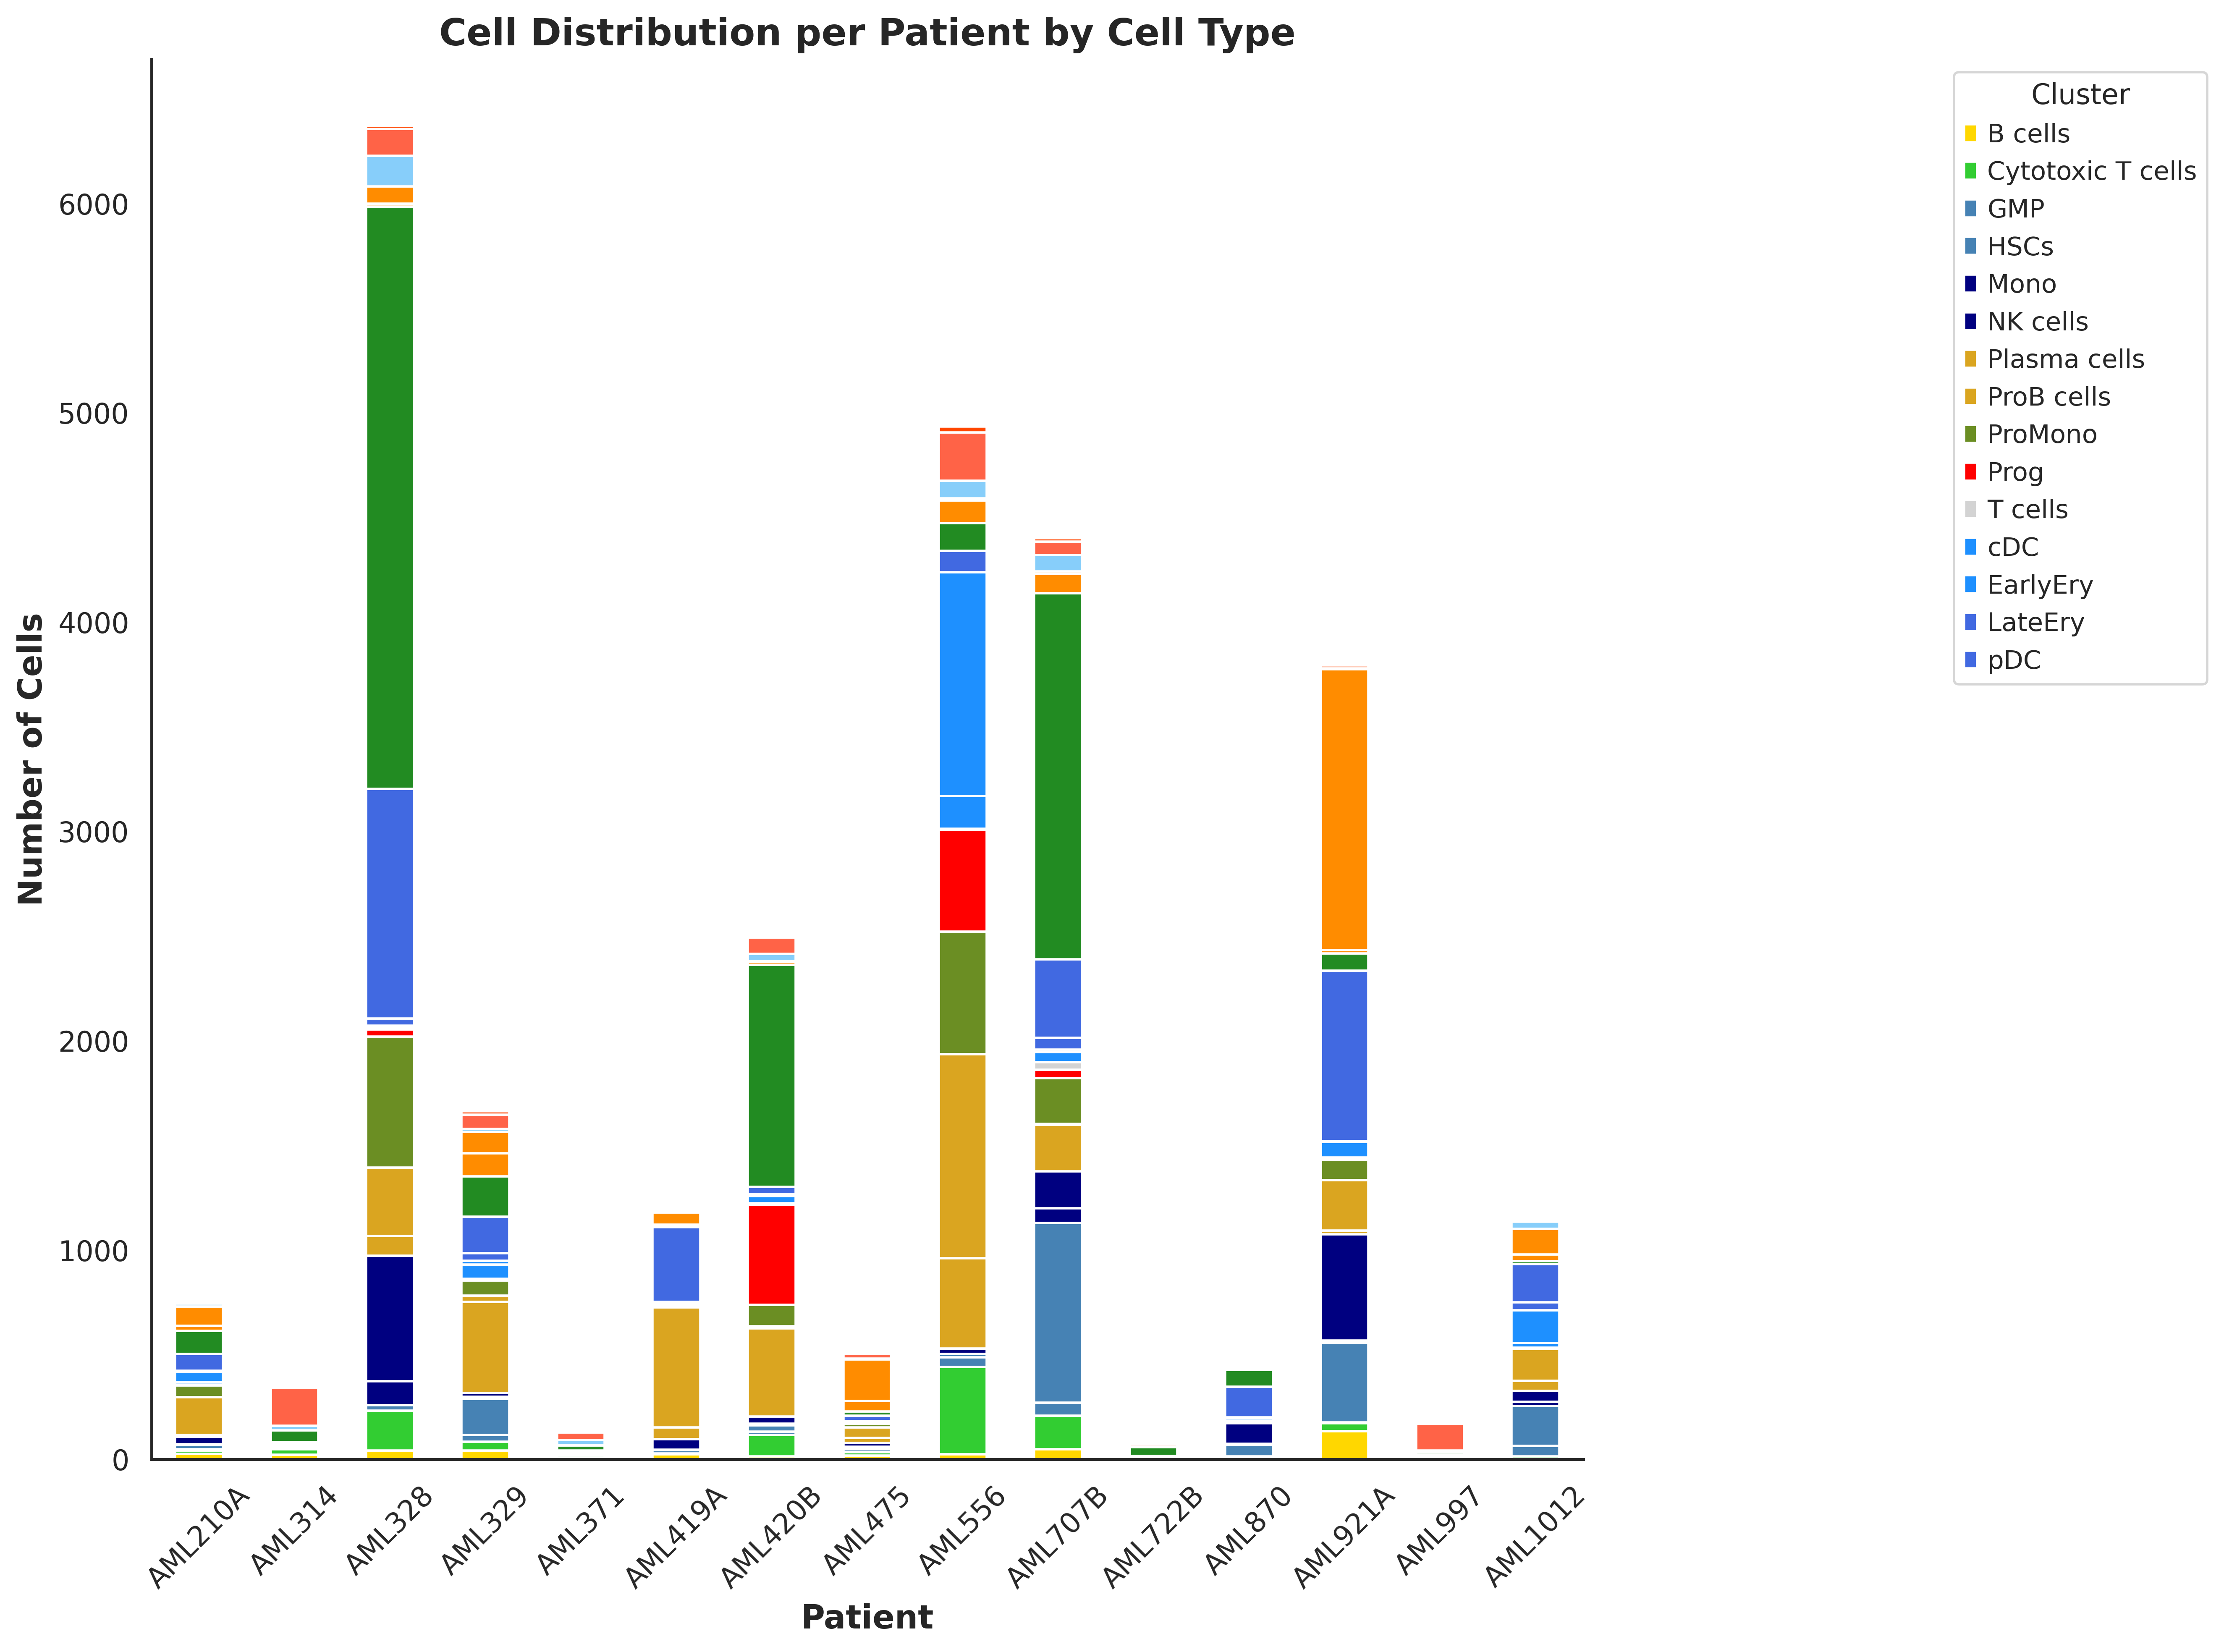

In [114]:
### Plotting the Number of Cells per Patient by Cell Type

# Define clusters and their corresponding cell types for grouping
cluster_mapping = {
    'T cells': ['T'],
    'Cytotoxic T cells': ['CTL'],
    'NK cells': ['NK'],
    'HSCs': ['HSC', 'HSC-like'],
    'Prog': ['Prog', 'Prog-like'],
    'GMP': ['GMP', 'GMP-like'],
    'ProMono': ['ProMono', 'ProMono-like'],
    'EarlyEry': ['earlyEry'],
    'ProB cells': ['ProB'],
    'Mono': ['Mono', 'Mono-like'],
    'B cells': ['B'],
    'cDC': ['cDC', 'cDC-like'],
    'pDC': ['pDC'],
    'LateEry': ['lateEry'],
    'Plasma cells': ['Plasma']
}

# Define a color palette based on the cell types
color_palette = {
    'T cells': '#228B22',
    'Cytotoxic T cells': '#32CD32',
    'NK cells': '#6B8E23',
    'HSCs': '#000080',
    'Prog': '#4169E1',
    'GMP': '#4682B4',
    'ProMono': '#1E90FF',
    'EarlyEry': '#87CEFA',
    'ProB cells': '#D3D3D3',
    'Mono': '#DAA520',
    'B cells': '#FFD700',
    'cDC': '#FF8C00',
    'pDC': '#FF4500',
    'LateEry': '#FF6347',
    'Plasma cells': '#FF0000'
}

# Assign colors to cell types based on clusters
cell_type_colors = {}
for cluster, cell_types in cluster_mapping.items():
    for cell_type in cell_types:
        cell_type_colors[cell_type] = color_palette[cluster]

# Assign the colors to the cell types in adata_tumor
adata_tumor.obs['original_celltype_1'] = adata_tumor.obs['original_celltype_1'].astype('category')
adata_tumor.uns['original_celltype_1_colors'] = [cell_type_colors[cell_type] for cell_type in adata_tumor.obs['original_celltype_1'].cat.categories]

# Group by 'Patient' and 'original_celltype_1' and count the number of cells
cell_counts = adata_tumor.obs.groupby(['Patient', 'original_celltype_1']).size().unstack(fill_value=0)

# Set the plot style
sns.set(style="white")  # No gridlines for cleaner visuals

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))
colors = [cell_type_colors[cell_type] for cell_type in cell_counts.columns]
cell_counts.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Customize the plot for a modern look
plt.xlabel('Patient', fontsize=14, fontweight='bold')
plt.ylabel('Number of Cells', fontsize=14, fontweight='bold')
plt.title('Cell Distribution per Patient by Cell Type', fontsize=16, fontweight='bold')

# Adjust the legend for better readability
handles, labels = ax.get_legend_handles_labels()
new_labels = []
seen_clusters = set()
for label in labels:
    for cluster, cell_types in cluster_mapping.items():
        if label in cell_types and cluster not in seen_clusters:
            new_labels.append(cluster)
            seen_clusters.add(cluster)
ax.legend(handles, new_labels, title='Cluster', bbox_to_anchor=(1.25, 1), loc='upper left')  # Place legend outside plot

# Customize x and y ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
sns.despine()

# Save the plot as a high-resolution PNG
plt.tight_layout()
plt.savefig('cell_distribution_plot.png', dpi=300)

# Show the plot
plt.show()

In [ ]:
# Group by 'Patient' and 'original_celltype_1' to count the number of cells for each combination
cell_counts_table = adata_tumor.obs.groupby(['Patient', 'original_celltype_1']).size().unstack(fill_value=0)
cell_counts_table.to_csv('cell_counts_per_patient.csv')

# Analysis per Gene: Heatmap by Cell Type and Organ

In [ ]:
print(len(adata_healthy.obs['Organ'].value_counts()))
adata_healthy.obs['Organ'].value_counts()

In [ ]:
organs = [
    # Immune cells
    # Bone Marrow
    # Lymph Node
    # Blood & Vascular 
    # Brain
    # Eye
    # Thyroid Gland
    # Trachea
    # Lung
    # Heart
    # Spleen
    # Liver
    # Gall Bladder
    # Salivary Gland
    # Tongue
    # Oesophagus
    # Stomach
    # Gut (Small Intestine) & Gut (Colon)
    # Pancreas
    # Omentum
    # Adrenal Gland
    # Kidney
    # Bladder
    # Prostate
    # Uterus
    # Fallopian Tube
    # Breast
    # Adipose Tissue
    # Muscle
    # Skin
    # Others
]

## Reihenfolge Zellen (cells)

In [ ]:
adata_healthy.obs['celltype'] = adata_healthy.obs['celltype'].cat.rename_categories({
    'Oviductal epithelial  cells': 'Oviductal epithelial cells'
})

In [ ]:
print(len(adata_healthy.obs['celltype'].value_counts()))
adata_healthy.obs['celltype'].value_counts()

In [ ]:
# Not all cells were included in this example
cells = [
    # Immune cells
    "B cells",
    "Basophil cells",
    "Common myeloid progenitor cells",
    "Dendritic cells",
    "Granulocyte cells",
    "Innate lymphoid cells",
    "Leukocytes",
    "Lymphocytes",
    "Macrophages",
    "Mast cells",
    "Monocytes",
    "Myeloid cells",
    "Neutrophils",
    "NK cells",
    "Plasma cells",
    "T cells",

    # Bone Marrow
    "Hematopoietic stem cells",
    "Erythroid progenitor cells",
    # Lymph Node
    #"Lymphocytes",
    "Lymphatic endothelial cells",

    # Blood & Vascular 
    "Endothelial cells",
    "Erythroid cells",
    "Thrombocytes",
     "Vascular and leptomeningeal cells",
    "Pericytes",

    # Brain
    "Astrocytes",
    "Cerebellar epithelial cells",
    "Glial cells",
    "Microglial cells",
    "Neurons",
    "Oligodendrocytes",
    "Radial glial progenitor cells",
    

    # Eye
    "Conjunctival epithelial cells",
    "Corneal epithelial cells",
    "Keratocytes",
    "Lacrimal sac epithelial cells",
    "Retinal photoreceptor cells",
    "Retinal pigment epithelial cells",
    "Retinal stem cells",

    # Thyroid Gland
    "Thyroid follicular cells",

    # Trachea & Lung
    "Alveolar cells",
    "Airway epithelial cells",
    "Ciliary pigment epithelial cells",

    # Heart
    "Cardiomyocytes",

    # Spleen

    # Liver
    "Cholangiocytes",
    "Hepatocytes",

    # Gall Bladder
    "Gall bladder epithelial cells",

    # Salivary Gland
    "Salivary acinar gland cells",
    "Salivary duct cells",
    "Salivary gland cells",

    # Tongue
    "Tongue epithelial cells",

    # Oesophagus
    "Oesophageal epithelial cells",

    # Stomach
    "Gastric chief cells",
    "Gastric epithelial cells",
    "Gastric parietal cells",
    "Gastric pit cells",
    "Gastric XA-like cells",

    # Gut (Small Intestine) & Gut (Colon)
    "Intestinal epithelial cells",
    "Intestinal secretory cells",
    "Intestinal stem cells",

    # Pancreas
    "Pancreatic acinar cells",
    "Pancreatic ductal cells",
    "Pancreatic endocrine cells",
    "Pancreatic stellate cells",

    # Omentum
    "Unknown",

    # Adrenal Gland
    "Chromaffin cell",
    "Intra-adrenal chromoblasts",
    "Intra-adrenal MT high cells",
    "Zona fasciculata cells",

    # Kidney
    "Collecting duct system cells",
    "Podocytes",
    "Tubule cells",

    # Bladder
    "Urothelial cells",

    # Prostate
    "Prostate epithelium cells",

    # Uterus
    "Epithelial uterus cells",
    "Myometrial uterus cells",

    # Fallopian Tube
    "Oviductal epithelial cells",

    # Breast
    "Mammary endocrine cells",
    "Mammary epithelial gland cells",
    "Mammary progenitor cells",

    # Adipose Tissue
    "Adipocytes",

    # Muscle
    "Skeletal muscle cells",
    "Skeletal satellite cells",
    "Tendon cells",

    # Skin
    "Basal cells",
    "Keratinocytes",
    "Melanocytes",

    # Others
    "Ectodermal cells",
    "Fibroblast cells",
    "Mesothelial cells",
    "Mucosal squamous cells",
    "Mesenchymal stem cells",
    "Mesenchymal stromal cells",
    "Multiciliated cells",
    "Myofibroblast cells",
    "Secretory cells",
    "Smooth muscle cells",
    "Sperm cells"
   
]

In [ ]:
for i in adata_healthy.obs['celltype'].cat.categories:
    if i in cells:
        u =0
    else:
        print(i)

In [ ]:
for i in cells:
    if i in adata_healthy.obs['celltype'].cat.categories:
        u =0
    else:
        print(i)

In [ ]:
# Set to track seen elements
seen = set()
# List to track duplicates
duplicates = []

# Iterate through the cells list
for cell in cells:
    # If the cell is already in seen, it's a duplicate
    if cell in seen:
        duplicates.append(cell)
    else:
        seen.add(cell)

# Output the duplicates
print("Duplicate values:", duplicates)

## Reihenfolge Datasets (datasets)

In [ ]:
print(len(adata_healthy.obs['Dataset'].value_counts()))
adata_healthy.obs['Dataset'].value_counts()

In [ ]:
# Not all datasets were included in this example
datasets = [
    # Immune cells

    # Bone Marrow
    "Pisco_BoneMarrow",

    # Lymph Node
    "Kim_LymphNode",

    # Blood & Vascular 
    "Pisco_Blood",

    # Brain
    "Brainmap_Brain_MultipleAreas",
    "Han_Brain_Cerebellum",

    # Eye
    "Lukowski_Eye",
    "Pisco_Eye",

    # Thyroid Gland
    "Han_ThyroidGland",

    # Trachea
    "Pisco_Trachea",

    # Lung
    "Madissoon_Lung",

    # Heart
    "Pisco_Heart",

    # Spleen
    "Pisco_Spleen",

    # Liver
    "Ramachandran_Liver",

    # Gall Bladder
    "Han_GallBladder",

    # Salivary Gland
    "Pisco_SalivaryGland",

    # Tongue
    "Pisco_Tongue",

    # Oesophagus
    "Madissoon_Oesophagus",

    # Stomach
    "Han_Stomach",

    # Gut (Small Intestine) & Gut (Colon)
    "Pisco_Gut_SmallIntestine",
    "Pisco_Gut_Colon",

    # Pancreas
    "Pisco_Pancreas",

    # Omentum
    "Han_Omentum",

    # Adrenal Gland
    "Han_AdrenalGland",

    # Kidney
    "Steward_Kidney",

    # Bladder

    # Prostate
    "Pisco_Prostate",

    # Uterus
    "Pisco_Uterus",

    # Fallopian Tube
    "Han_FallopianTube",

    # Breast
    "Nakshatri_Breast",

    # Adipose Tissue
    "Pisco_AdiposeTissue",

    # Muscle
    "Pisco_Muscle",

    # Skin
    "Cheng_Skin",

    # Others
]

In [ ]:
# Set to track seen elements
seen = set()
# List to track duplicates
duplicates = []

# Iterate through the cells list
for cell in datasets:
    # If the cell is already in seen, it's a duplicate
    if cell in seen:
        duplicates.append(cell)
    else:
        seen.add(cell)

# Output the duplicates
print("Duplicate values:", duplicates)

## Reihenfolge Organs (organs)

In [ ]:
print(len(adata_healthy.obs['Organ'].value_counts()))
adata_healthy.obs['Organ'].value_counts()

In [ ]:
organs = [
    # Immune cells
    #"Blood",
    
    # Bone Marrow
    "BoneMarrow",
    
    # Lymph Node
    "LymphNode",
    
    # Blood & Vascular 
    "Blood",

    # Brain
    "Brain",

    # Eye
    "Eye",

    # Thyroid Gland
    "ThyroidGland",

    # Trachea
    "Trachea",

    # Lung
    "Lung",

    # Heart
    "Heart",

    # Spleen
    "Spleen",

    # Liver
    "Liver",

    # Gall Bladder
    "GallBladder",

    # Salivary Gland
    "SalivaryGland",

    # Tongue
    "Tongue",

    # Oesophagus
    "Oesophagus",

    # Stomach
    "Stomach",

    # Gut (Small Intestine) & Gut (Colon)
    "Gut_SmallIntestine",
    "Gut_Colon",

    # Pancreas
    "Pancreas",

    # Omentum
    "Omentum",

    # Adrenal Gland
    "AdrenalGland",

    # Kidney
    "Kidney",

    # Bladder
    "Bladder",

    # Prostate
    "Prostate",

    # Uterus
    "Uterus",

    # Fallopian Tube
    "FallopianTube",

    # Breast
    "Breast",

    # Adipose Tissue
    "AdiposeTissue",

    # Muscle
    "Muscle",

    # Skin
    "Skin",

    # Others
]

In [ ]:
# Set to track seen elements
seen = set()
# List to track duplicates
duplicates = []

# Iterate through the cells list
for cell in organs:
    # If the cell is already in seen, it's a duplicate
    if cell in seen:
        duplicates.append(cell)
    else:
        seen.add(cell)

# Output the duplicates
print("Duplicate values:", duplicates)

In [ ]:
# Reordering categories for 'Organ', 'celltype', and 'Dataset' in adata_healthy
adata_healthy.obs['Organ'] = adata_healthy.obs['Organ'].cat.reorder_categories(organs, ordered=True)
adata.obs.sort_values('Organ', inplace=True)

adata_healthy.obs['celltype'] = adata_healthy.obs['celltype'].cat.reorder_categories(cells, ordered=True)
adata.obs.sort_values('celltype', inplace=True)

adata_healthy.obs['Dataset'] = adata_healthy.obs['Dataset'].cat.reorder_categories(datasets, ordered=True)
adata.obs.sort_values('Dataset', inplace=True)

## Darstellung der Gene in der Matrixplot

### NTRK1

In [ ]:
gene_of_interest = "NTRK1" # NTRK1, CD33, IL3RA, CSF1R, and CD86 

In [ ]:
adata_healthy.var['genes'] = adata_healthy.var.index
ix=np.isin(adata_healthy.var['genes'], gene_of_interest)
adata_healthy_gene=adata_healthy[:,ix].copy()

In [ ]:
celltypes = cells
datasets = organs

mean_expression_df = pd.DataFrame(index=celltypes, columns=datasets)

In [ ]:
adata_healthy_gene.X = adata_healthy_gene.X.astype(float)

In [ ]:
count = 0

# Iterate through each cell type in `celltypes`
for celltype in celltypes:
    
    count += 1  # Increment the counter for each cell type processed
    
    # Create a boolean index to filter the AnnData object for the current cell type
    ix = np.isin(adata_healthy.obs['celltype'], celltype)
    adata_healthy_gene_celltype = adata_healthy_gene[ix].copy()  # Subset
    
    print(celltype, ': ', len(adata_healthy_gene_celltype.obs))
    
    adata_healthy_gene_celltype.X = adata_healthy_gene_celltype.X.todense()
    adata_healthy_gene_celltype.X = adata_healthy_gene_celltype.X.astype(float)
    
    # Create an empty DataFrame to store the mean values per organ
    df = pd.DataFrame()
    
    # Extract the 'Organ' column from the observation data (obs) and add it to the DataFrame
    df['Organ'] = adata_healthy_gene_celltype.obs['Organ'].tolist()
    
    # Convert each row in the gene expression matrix (X) to a list and compute the mean for each row (cell)
    df['Dataset_value'] = [np.mean(row) for row in adata_healthy_gene_celltype.X]
    
    # Group by 'Organ' and calculate the mean expression per organ
    mean_df = df.groupby('Organ')['Dataset_value'].mean().reset_index()
    
    mean_df.index = mean_df['Organ']
    del mean_df['Organ']
    
    for dataset in mean_df.index:
        mean_expression_df[dataset][celltype] = mean_df['Dataset_value'][dataset]

In [ ]:
mean_expression_df.replace('NaN', np.nan, inplace=True)
mean_expression_df = mean_expression_df.astype(float)
mean_expression_df = mean_expression_df.loc[cells, datasets]

In [ ]:
mean_expression_df[:3]

In [ ]:
# Create an AnnData object from the mean expression DataFrame
adata_df = anndata.AnnData(X=mean_expression_df.values)

# Add cell types as observations (obs)
adata_df.obs['celltype'] = mean_expression_df.index

# Add datasets as variables (var)
adata_df.var['dataset'] = mean_expression_df.columns

# Set names for observations (obs) and variables (var)
adata_df.obs.index = mean_expression_df.index
adata_df.var.index = mean_expression_df.columns

In [ ]:
adata_df.strings_to_categoricals()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Define a custom color scale transitioning from white to red
colors = [
    (1, 1, 1),   # White
    (1, 0.9, 0.9),
    (1, 0.8, 0.8),
    (1, 0.7, 0.7),
    (1, 0.6, 0.6),
    (1, 0.5, 0.5),
    (1, 0.4, 0.4),
    (1, 0.3, 0.3),
    (1, 0.2, 0.2),
    (1, 0.1, 0.1),
    (1, 0, 0)    # Red
]

n_bins = 256  # Number of color gradations
cmap_name = 'custom_white_red'  # Name for the custom colormap

# Create the colormap using the specified colors and number of bins
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)


In [ ]:
sc.pl.matrixplot(adata_df,
                 var_names=datasets,
                # var_group_positions = datasets,
                 
                 groupby='celltype', #categories_order=cells,
                 dendrogram=False, vmax=0.04, vmin=0.0000000000001, use_raw=False,
                 #cmap='Reds', #standard_scale='var',
                 cmap = cm)

#### Subset for more detail

##### Immunzellen

In [ ]:
celltypes_of_interest = ["B cells",
    "Basophil cells",
    "Common myeloid progenitor cells",
    "Dendritic cells",
    "Granulocyte cells",
    "Innate lymphoid cells",
    "Leukocytes",
    "Lymphocytes",
    "Macrophages",
    "Mast cells",
    "Monocytes",
    "Myeloid cells",
    "Neutrophils",
    "NK cells",
    "Plasma cells",
    "T cells"]

In [ ]:
subset_adata = adata_df[adata_df.obs['celltype'].isin(celltypes_of_interest)]

In [ ]:
sc.pl.matrixplot(subset_adata,
                 var_names=datasets,
                # var_group_positions = datasets,
                 
                 groupby='celltype', #categories_order=cells,
                 dendrogram=False, vmax=0.3, vmin=0.000001, use_raw=False,
                 #cmap='Reds', #standard_scale='var',
                 cmap = cm)

##### Neuronale Zellen

In [ ]:
organs = [

    # Brain
    "Brain",

    # Eye
    "Eye",

    # Tongue
    "Tongue",

    # Adrenal Gland
    "AdrenalGland"

]

In [ ]:
celltypes_of_interest = [ # Brain
    "Astrocytes",
    "Cerebellar epithelial cells",
    "Glial cells",
    "Microglial cells",
    "Neurons",
    "Oligodendrocytes",
    "Radial glial progenitor cells",
    

    # Eye
    "Conjunctival epithelial cells",
    "Corneal epithelial cells",
    "Keratocytes",
    "Lacrimal sac epithelial cells",
    "Retinal photoreceptor cells",
    "Retinal pigment epithelial cells",
    "Retinal stem cells"]

In [ ]:
subset_adata = adata_df[adata_df.obs['celltype'].isin(celltypes_of_interest)]

In [ ]:
sc.pl.matrixplot(subset_adata,
                 var_names=organs,
                # var_group_positions = datasets,
                 
                 groupby='celltype', #categories_order=cells,
                 dendrogram=False, vmax=0.3, vmin=0.000001, use_raw=False,
                 #cmap='Reds', #standard_scale='var',
                 cmap = cm)

##### Epithelzellen & Drüsenzellen

In [ ]:
organs = [
    # Brain
   # "Brain",

    # Eye
    "Eye",

    # Thyroid Gland
   # "ThyroidGland",

    # Trachea
    "Trachea",

    # Salivary Gland
    "SalivaryGland",

    # Tongue
    "Tongue",

    # Oesophagus
    "Oesophagus",

    # Stomach
    "Stomach",

    # Gut (Small Intestine) & Gut (Colon)
    "Gut_SmallIntestine",
    "Gut_Colon",

    # Pancreas
    "Pancreas",

    # Omentum
    #"Omentum",


    # Kidney
    "Kidney",

    # Bladder
    "Bladder",

    # Prostate
    "Prostate",

    # Fallopian Tube
    "FallopianTube",

    # Breast
    "Breast",
]

In [ ]:
celltypes_of_interest = [
    # Epithelial Cells
    "Conjunctival epithelial cells",
    "Corneal epithelial cells",
    "Ciliary pigment epithelial cells",
    "Gastric epithelial cells",
    "Intestinal epithelial cells",
    "Oesophageal epithelial cells",
    "Airway epithelial cells",
    "Lacrimal sac epithelial cells",
    "Thyroid follicular cells",
    "Retinal pigment epithelial cells",
    "Urothelial cells",
    "Prostate epithelium cells",
    "Epithelial uterus cells",
    "Oviductal epithelial cells",
    "Tongue epithelial cells",
    "Collecting duct system cells",

    # Gland Cells
    "Salivary acinar gland cells",
    "Salivary duct cells",
    "Salivary gland cells",
    "Pancreatic acinar cells",
    "Pancreatic ductal cells",
    "Mammary epithelial gland cells",
    "Gastric chief cells",
    "Gastric parietal cells",
    "Gastric pit cells",
    "Gastric XA-like cells",
    "Intestinal secretory cells",
    "Thyroid follicular cells",
    "Pancreatic endocrine cells",
]

In [ ]:
subset_adata = adata_df[adata_df.obs['celltype'].isin(celltypes_of_interest)]

In [ ]:
sc.pl.matrixplot(subset_adata,
                 var_names=organs,
                # var_group_positions = datasets,
                 
                 groupby='celltype', #categories_order=cells,
                 dendrogram=False, vmax=0.3, vmin=0.000001, use_raw=False,
                 #cmap='Reds', #standard_scale='var',
                 cmap = cm)

##### Bindegewebs- und Stromazellen

In [ ]:
organs = [
   
    # Eye
    "Eye",

    # Thyroid Gland
    "ThyroidGland",

    # Trachea
    "Trachea",

    # Lung
    "Lung",

    # Heart
    "Heart",

    # Liver
    "Liver",

    # Gall Bladder
    "GallBladder",

    # Salivary Gland
    "SalivaryGland",

    # Tongue
    "Tongue",

    # Oesophagus
    "Oesophagus",

    # Stomach
    "Stomach",

    # Gut (Small Intestine) & Gut (Colon)
    "Gut_SmallIntestine",
    "Gut_Colon",

    # Pancreas
    "Pancreas",

    # Omentum
    "Omentum",

    # Adrenal Gland
    "AdrenalGland",

    # Kidney
    "Kidney",

    # Bladder
    "Bladder",

    # Prostate
    "Prostate",

    # Uterus
    "Uterus",

    # Fallopian Tube
    "FallopianTube",

    # Adipose Tissue
    "AdiposeTissue",

    # Muscle
    "Muscle",

]

In [ ]:
celltypes_of_interest = [
    "Fibroblast cells",
    "Mesothelial cells",
    "Myofibroblast cells",
    "Mesenchymal stem cells",
    "Mesenchymal stromal cells",
    "Smooth muscle cells",
    
    "Skeletal muscle cells",
    "Skeletal satellite cells",
    "Tendon cells",
]

In [ ]:
subset_adata = adata_df[adata_df.obs['celltype'].isin(celltypes_of_interest)]

In [ ]:
sc.pl.matrixplot(subset_adata,
                 var_names=organs,
                # var_group_positions = datasets,
                 
                 groupby='celltype', #categories_order=cells,
                 dendrogram=False, vmax=0.3, vmin=0.000001, use_raw=False,
                 #cmap='Reds', #standard_scale='var',
                 cmap = cm)

### CD33

In [ ]:
gene_of_interest = "CD33" # NTRK1, CD33, IL3RA, CSF1R, and CD86 

In [ ]:
adata_healthy.var['genes'] = adata_healthy.var.index
ix=np.isin(adata_healthy.var['genes'], gene_of_interest)
adata_healthy_gene=adata_healthy[:,ix].copy()

In [ ]:
celltypes = cells
datasets = organs

mean_expression_df = pd.DataFrame(index=celltypes, columns=datasets)

In [ ]:
adata_healthy_gene.X = adata_healthy_gene.X.astype(float)

In [ ]:
count = 0

# Iterate through each cell type in `celltypes`
for celltype in celltypes:
    
    count += 1  # Increment the counter for each cell type processed
    
    # Create a boolean index to filter the AnnData object for the current cell type
    ix = np.isin(adata_healthy.obs['celltype'], celltype)
    adata_healthy_gene_celltype = adata_healthy_gene[ix].copy()  # Subset
    
    print(celltype, ': ', len(adata_healthy_gene_celltype.obs))
    
    adata_healthy_gene_celltype.X = adata_healthy_gene_celltype.X.todense()
    adata_healthy_gene_celltype.X = adata_healthy_gene_celltype.X.astype(float)
    
    # Create an empty DataFrame to store the mean values per organ
    df = pd.DataFrame()
    
    # Extract the 'Organ' column from the observation data (obs) and add it to the DataFrame
    df['Organ'] = adata_healthy_gene_celltype.obs['Organ'].tolist()
    
    # Convert each row in the gene expression matrix (X) to a list and compute the mean for each row (cell)
    df['Dataset_value'] = [np.mean(row) for row in adata_healthy_gene_celltype.X]
    
    # Group by 'Organ' and calculate the mean expression per organ
    mean_df = df.groupby('Organ')['Dataset_value'].mean().reset_index()
    
    mean_df.index = mean_df['Organ']
    del mean_df['Organ']
    
    for dataset in mean_df.index:
        mean_expression_df[dataset][celltype] = mean_df['Dataset_value'][dataset]

In [ ]:
mean_expression_df.replace('NaN', np.nan, inplace=True)
mean_expression_df = mean_expression_df.astype(float)
mean_expression_df = mean_expression_df.loc[cells, datasets]

In [ ]:
mean_expression_df[:3]

In [ ]:
# Create an AnnData object from the mean expression DataFrame
adata_df = anndata.AnnData(X=mean_expression_df.values)

# Add cell types as observations (obs)
adata_df.obs['celltype'] = mean_expression_df.index

# Add datasets as variables (var)
adata_df.var['dataset'] = mean_expression_df.columns

# Set names for observations (obs) and variables (var)
adata_df.obs.index = mean_expression_df.index
adata_df.var.index = mean_expression_df.columns

In [ ]:
adata_df.strings_to_categoricals()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Define a custom color scale transitioning from white to red
colors = [
    (1, 1, 1),   # White
    (1, 0.9, 0.9),
    (1, 0.8, 0.8),
    (1, 0.7, 0.7),
    (1, 0.6, 0.6),
    (1, 0.5, 0.5),
    (1, 0.4, 0.4),
    (1, 0.3, 0.3),
    (1, 0.2, 0.2),
    (1, 0.1, 0.1),
    (1, 0, 0)    # Red
]

n_bins = 256  # Number of color gradations
cmap_name = 'custom_white_red'  # Name for the custom colormap

# Create the colormap using the specified colors and number of bins
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)


In [ ]:
sc.pl.matrixplot(adata_df,
                 var_names=datasets,
                # var_group_positions = datasets,
                 
                 groupby='celltype', #categories_order=cells,
                 dendrogram=False, vmax=0.04, vmin=0.0000000000001, use_raw=False,
                 #cmap='Reds', #standard_scale='var',
                 cmap = cm)

### IL3RA

In [ ]:
gene_of_interest = "IL3RA" # NTRK1, CD33, IL3RA, CSF1R, and CD86 

In [ ]:
adata_healthy.var['genes'] = adata_healthy.var.index
ix=np.isin(adata_healthy.var['genes'], gene_of_interest)
adata_healthy_gene=adata_healthy[:,ix].copy()

In [ ]:
celltypes = cells
datasets = organs

mean_expression_df = pd.DataFrame(index=celltypes, columns=datasets)

In [ ]:
adata_healthy_gene.X = adata_healthy_gene.X.astype(float)

In [ ]:
count = 0

# Iterate through each cell type in `celltypes`
for celltype in celltypes:
    
    count += 1  # Increment the counter for each cell type processed
    
    # Create a boolean index to filter the AnnData object for the current cell type
    ix = np.isin(adata_healthy.obs['celltype'], celltype)
    adata_healthy_gene_celltype = adata_healthy_gene[ix].copy()  # Subset
    
    print(celltype, ': ', len(adata_healthy_gene_celltype.obs))
    
    adata_healthy_gene_celltype.X = adata_healthy_gene_celltype.X.todense()
    adata_healthy_gene_celltype.X = adata_healthy_gene_celltype.X.astype(float)
    
    # Create an empty DataFrame to store the mean values per organ
    df = pd.DataFrame()
    
    # Extract the 'Organ' column from the observation data (obs) and add it to the DataFrame
    df['Organ'] = adata_healthy_gene_celltype.obs['Organ'].tolist()
    
    # Convert each row in the gene expression matrix (X) to a list and compute the mean for each row (cell)
    df['Dataset_value'] = [np.mean(row) for row in adata_healthy_gene_celltype.X]
    
    # Group by 'Organ' and calculate the mean expression per organ
    mean_df = df.groupby('Organ')['Dataset_value'].mean().reset_index()
    
    mean_df.index = mean_df['Organ']
    del mean_df['Organ']
    
    for dataset in mean_df.index:
        mean_expression_df[dataset][celltype] = mean_df['Dataset_value'][dataset]

In [ ]:
mean_expression_df.replace('NaN', np.nan, inplace=True)
mean_expression_df = mean_expression_df.astype(float)
mean_expression_df = mean_expression_df.loc[cells, datasets]

In [ ]:
mean_expression_df[:3]

In [ ]:
# Create an AnnData object from the mean expression DataFrame
adata_df = anndata.AnnData(X=mean_expression_df.values)

# Add cell types as observations (obs)
adata_df.obs['celltype'] = mean_expression_df.index

# Add datasets as variables (var)
adata_df.var['dataset'] = mean_expression_df.columns

# Set names for observations (obs) and variables (var)
adata_df.obs.index = mean_expression_df.index
adata_df.var.index = mean_expression_df.columns

In [ ]:
adata_df.strings_to_categoricals()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Define a custom color scale transitioning from white to red
colors = [
    (1, 1, 1),   # White
    (1, 0.9, 0.9),
    (1, 0.8, 0.8),
    (1, 0.7, 0.7),
    (1, 0.6, 0.6),
    (1, 0.5, 0.5),
    (1, 0.4, 0.4),
    (1, 0.3, 0.3),
    (1, 0.2, 0.2),
    (1, 0.1, 0.1),
    (1, 0, 0)    # Red
]

n_bins = 256  # Number of color gradations
cmap_name = 'custom_white_red'  # Name for the custom colormap

# Create the colormap using the specified colors and number of bins
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)


In [ ]:
sc.pl.matrixplot(adata_df,
                 var_names=datasets,
                # var_group_positions = datasets,
                 
                 groupby='celltype', #categories_order=cells,
                 dendrogram=False, vmax=0.04, vmin=0.0000000000001, use_raw=False,
                 #cmap='Reds', #standard_scale='var',
                 cmap = cm)

### CSF1R

In [ ]:
gene_of_interest = "CSF1R" # NTRK1, CD33, IL3RA, CSF1R, and CD86 

In [ ]:
adata_healthy.var['genes'] = adata_healthy.var.index
ix=np.isin(adata_healthy.var['genes'], gene_of_interest)
adata_healthy_gene=adata_healthy[:,ix].copy()

In [ ]:
celltypes = cells
datasets = organs

mean_expression_df = pd.DataFrame(index=celltypes, columns=datasets)

In [ ]:
adata_healthy_gene.X = adata_healthy_gene.X.astype(float)

In [ ]:
count = 0

# Iterate through each cell type in `celltypes`
for celltype in celltypes:
    
    count += 1  # Increment the counter for each cell type processed
    
    # Create a boolean index to filter the AnnData object for the current cell type
    ix = np.isin(adata_healthy.obs['celltype'], celltype)
    adata_healthy_gene_celltype = adata_healthy_gene[ix].copy()  # Subset
    
    print(celltype, ': ', len(adata_healthy_gene_celltype.obs))
    
    adata_healthy_gene_celltype.X = adata_healthy_gene_celltype.X.todense()
    adata_healthy_gene_celltype.X = adata_healthy_gene_celltype.X.astype(float)
    
    # Create an empty DataFrame to store the mean values per organ
    df = pd.DataFrame()
    
    # Extract the 'Organ' column from the observation data (obs) and add it to the DataFrame
    df['Organ'] = adata_healthy_gene_celltype.obs['Organ'].tolist()
    
    # Convert each row in the gene expression matrix (X) to a list and compute the mean for each row (cell)
    df['Dataset_value'] = [np.mean(row) for row in adata_healthy_gene_celltype.X]
    
    # Group by 'Organ' and calculate the mean expression per organ
    mean_df = df.groupby('Organ')['Dataset_value'].mean().reset_index()
    
    mean_df.index = mean_df['Organ']
    del mean_df['Organ']
    
    for dataset in mean_df.index:
        mean_expression_df[dataset][celltype] = mean_df['Dataset_value'][dataset]

In [ ]:
mean_expression_df.replace('NaN', np.nan, inplace=True)
mean_expression_df = mean_expression_df.astype(float)
mean_expression_df = mean_expression_df.loc[cells, datasets]

In [ ]:
mean_expression_df[:3]

In [ ]:
# Create an AnnData object from the mean expression DataFrame
adata_df = anndata.AnnData(X=mean_expression_df.values)

# Add cell types as observations (obs)
adata_df.obs['celltype'] = mean_expression_df.index

# Add datasets as variables (var)
adata_df.var['dataset'] = mean_expression_df.columns

# Set names for observations (obs) and variables (var)
adata_df.obs.index = mean_expression_df.index
adata_df.var.index = mean_expression_df.columns

In [ ]:
adata_df.strings_to_categoricals()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Define a custom color scale transitioning from white to red
colors = [
    (1, 1, 1),   # White
    (1, 0.9, 0.9),
    (1, 0.8, 0.8),
    (1, 0.7, 0.7),
    (1, 0.6, 0.6),
    (1, 0.5, 0.5),
    (1, 0.4, 0.4),
    (1, 0.3, 0.3),
    (1, 0.2, 0.2),
    (1, 0.1, 0.1),
    (1, 0, 0)    # Red
]

n_bins = 256  # Number of color gradations
cmap_name = 'custom_white_red'  # Name for the custom colormap

# Create the colormap using the specified colors and number of bins
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)


In [ ]:
sc.pl.matrixplot(adata_df,
                 var_names=datasets,
                # var_group_positions = datasets,
                 
                 groupby='celltype', #categories_order=cells,
                 dendrogram=False, vmax=0.04, vmin=0.0000000000001, use_raw=False,
                 #cmap='Reds', #standard_scale='var',
                 cmap = cm)

### CD86

In [ ]:
gene_of_interest = "CD86" # NTRK1, CD33, IL3RA, CSF1R, and CD86 

In [ ]:
adata_healthy.var['genes'] = adata_healthy.var.index
ix=np.isin(adata_healthy.var['genes'], gene_of_interest)
adata_healthy_gene=adata_healthy[:,ix].copy()

In [ ]:
celltypes = cells
datasets = organs

mean_expression_df = pd.DataFrame(index=celltypes, columns=datasets)

In [ ]:
adata_healthy_gene.X = adata_healthy_gene.X.astype(float)

In [ ]:
count = 0

# Iterate through each cell type in `celltypes`
for celltype in celltypes:
    
    count += 1  # Increment the counter for each cell type processed
    
    # Create a boolean index to filter the AnnData object for the current cell type
    ix = np.isin(adata_healthy.obs['celltype'], celltype)
    adata_healthy_gene_celltype = adata_healthy_gene[ix].copy()  # Subset
    
    print(celltype, ': ', len(adata_healthy_gene_celltype.obs))
    
    adata_healthy_gene_celltype.X = adata_healthy_gene_celltype.X.todense()
    adata_healthy_gene_celltype.X = adata_healthy_gene_celltype.X.astype(float)
    
    # Create an empty DataFrame to store the mean values per organ
    df = pd.DataFrame()
    
    # Extract the 'Organ' column from the observation data (obs) and add it to the DataFrame
    df['Organ'] = adata_healthy_gene_celltype.obs['Organ'].tolist()
    
    # Convert each row in the gene expression matrix (X) to a list and compute the mean for each row (cell)
    df['Dataset_value'] = [np.mean(row) for row in adata_healthy_gene_celltype.X]
    
    # Group by 'Organ' and calculate the mean expression per organ
    mean_df = df.groupby('Organ')['Dataset_value'].mean().reset_index()
    
    mean_df.index = mean_df['Organ']
    del mean_df['Organ']
    
    for dataset in mean_df.index:
        mean_expression_df[dataset][celltype] = mean_df['Dataset_value'][dataset]

In [ ]:
mean_expression_df.replace('NaN', np.nan, inplace=True)
mean_expression_df = mean_expression_df.astype(float)
mean_expression_df = mean_expression_df.loc[cells, datasets]

In [ ]:
mean_expression_df[:3]

In [ ]:
# Create an AnnData object from the mean expression DataFrame
adata_df = anndata.AnnData(X=mean_expression_df.values)

# Add cell types as observations (obs)
adata_df.obs['celltype'] = mean_expression_df.index

# Add datasets as variables (var)
adata_df.var['dataset'] = mean_expression_df.columns

# Set names for observations (obs) and variables (var)
adata_df.obs.index = mean_expression_df.index
adata_df.var.index = mean_expression_df.columns

In [ ]:
adata_df.strings_to_categoricals()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Define a custom color scale transitioning from white to red
colors = [
    (1, 1, 1),   # White
    (1, 0.9, 0.9),
    (1, 0.8, 0.8),
    (1, 0.7, 0.7),
    (1, 0.6, 0.6),
    (1, 0.5, 0.5),
    (1, 0.4, 0.4),
    (1, 0.3, 0.3),
    (1, 0.2, 0.2),
    (1, 0.1, 0.1),
    (1, 0, 0)    # Red
]

n_bins = 256  # Number of color gradations
cmap_name = 'custom_white_red'  # Name for the custom colormap

# Create the colormap using the specified colors and number of bins
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)


In [ ]:
sc.pl.matrixplot(adata_df,
                 var_names=datasets,
                # var_group_positions = datasets,
                 
                 groupby='celltype', #categories_order=cells,
                 dendrogram=False, vmax=0.04, vmin=0.0000000000001, use_raw=False,
                 #cmap='Reds', #standard_scale='var',
                 cmap = cm)

In [ ]:
celltypes_of_interest = ["B cells",
    "Basophil cells",
    "Common myeloid progenitor cells",
    "Dendritic cells",
    "Granulocyte cells",
    "Innate lymphoid cells",
    "Leukocytes",
    "Lymphocytes",
    "Macrophages",
    "Mast cells",
    "Monocytes",
    "Myeloid cells",
    "Neutrophils",
    "NK cells",
    "Plasma cells",
    "T cells"]

In [ ]:
subset_adata = adata_df[adata_df.obs['celltype'].isin(celltypes_of_interest)]

In [ ]:
sc.pl.matrixplot(subset_adata,
                 var_names=datasets,
                # var_group_positions = datasets,
                 
                 groupby='celltype', #categories_order=cells,
                 dendrogram=False, vmax=0.3, vmin=0.000001, use_raw=False,
                 #cmap='Reds', #standard_scale='var',
                 cmap = cm)

# TRKA/NTRK1, CD33, CD123/IL3RA, CSF1R, CD86 in Tumor & Healthy Data

In [ ]:
adata_tumor

In [ ]:
adata_healthy

In [ ]:
(adata_healthy.obs['Organ'].value_counts())

In [ ]:
(adata_healthy.obs['celltype'].value_counts())

In [ ]:
(adata_healthy.obs['Dataset'].value_counts())

In [ ]:
ix=np.isin(adata_healthy.obs['Organ'],['BoneMarrow']) 
adata_healthy_bonemarrow=adata_healthy[ix].copy()
adata_healthy_bonemarrow

In [ ]:
gene_list = ['NTRK1', 'CD33', 'IL3RA', 'CSF1R', 'CD86']
for i in gene_list:
    if i in adata_tumor.var.index:
        print('Yes: ', i)
    else:
        print('No: ', i)

In [ ]:
# Not all cells & datasets included in this example
# Define clusters and assign them to organs or general categories
celltype_clusters = {
    'Brain': ['Neurons', 'Astrocytes', 'Oligodendrocytes', 'Microglial cells', 'Glial cells'],
    'Immune Cells': ['T cells', 'B cells', 'Monocytes', 'Macrophages', 'NK cells', 'Dendritic cells', 'Plasma cells', 'Neutrophils', 'Mast cells',
                     'Erythroid cells', 'Innate lymphoid cells', 'Erythroid progenitor cells', 'Hematopoietic stem cells', 'Leukocytes', 'Lymphocytes'],
    'Vascular Cells': ['Endothelial cells', 'Lymphatic endothelial cells', 'Pericytes'],
    'Skin': ['Basal cells', 'Keratinocytes', 'Melanocytes'],
    'Digestive Tract': ['Salivary acinar gland cells', 'Mucosal squamous cells', 'Oesophageal epithelial cells', 'Intestinal epithelial cells', 'Secretory cells',
                        'Gastric epithelial cells', 'Gastric chief cells', 'Gastric pit cells', 'Gastric parietal cells', 'Intestinal secretory cells', 'Intestinal stem cells'],
    'Lung': ['Alveolar cells'],
    'Kidney': ['Tubule cells', 'Collecting duct system cells', 'Podocytes'],
    'Prostate': ['Prostate epithelium cells'],
    'Eye': ['Retinal photoreceptor cells'],
    'Thyroid': ['Thyroid follicular cells'],
    'Breast': ['Mammary progenitor cells', 'Mammary epithelial gland cells', 'Mammary endocrine cells'],
    'Muscle': ['Skeletal muscle cells', 'Skeletal satellite cells', 'Tendon cells'],
    'Heart': ['Cardiomyocytes'],
    'Liver': ['Hepatocytes', 'Cholangiocytes'],
    'Adrenal Gland': ['Zona fasciculata cells', 'Intra-adrenal chromoblasts', 'Intra-adrenal MT high cells', 'Chromaffin cell'],
    'Pancreas': ['Pancreatic acinar cells', 'Pancreatic ductal cells', 'Pancreatic endocrine cells', 'Pancreatic stellate cells'],
    'Bladder': ['Urothelial cells'],
    'Tongue': ['Tongue epithelial cells'],
    'Omentum': ['Mesothelial cells'],
    'Uterus': ['Epithelial uterus cells', 'Myometrial uterus cells'],
    'Other Cells': ['Sperm cells'],
    'BoneMarrow': ['Mesenchymal stem cells', 'Hematopoietic stem cells', 'Common myeloid progenitor cells'],
    'Gewebe Cells': ['Fibroblast cells', 'Myofibroblast cells', 'Smooth muscle cells']
}

# Sort datasets by similar organs
datasets_order = [
    'Cobos_Brain', 'Brainmap_Brain_MultipleAreas',
    'Madissoon_Oesophagus', 'Pisco_SalivaryGland', 'Pisco_Tongue',
    'Cheng_Skin', 'Nakshatri_Breast',
    'Madissoon_Lung', 'Pisco_Trachea',
    'Pisco_Blood', 'Kim_LymphNode', 'Pisco_Spleen', 'Pisco_BoneMarrow',
    'Steward_Kidney',
    'Ramachandran_Liver',
    'Pisco_Muscle',
    'Han_AdrenalGland',
    'Pisco_Prostate',
    'Lukowski_Eye',
    'Han_Stomach', 'Pisco_Gut_Colon', 'Pisco_Gut_SmallIntestine', 
    'Pisco_Pancreas',
    'Han_Omentum',
    'Han_ThyroidGland',
    'Pisco_Heart',
    'Pisco_Uterus'
]

## UMAP Darstellung auf Van Galen (AML)

In [ ]:
(adata_tumor.obs['original_celltype_1'].value_counts())

In [ ]:
# Rename 'NonMalignant' to 'Healthy'
adata_tumor.obs['Malignant'] = adata_tumor.obs['Malignant'].replace({'NonMalignant': 'Healthy'})

# Custom color palette for 'Malignant' and 'Healthy'
custom_colors = {
    'Malignant': '#FF6347',  # Tomato red
    'Healthy': '#4682B4'  # Steel blue
}

# Ensure the color mapping is applied
adata_tumor.obs['Malignant'] = adata_tumor.obs['Malignant'].astype('category')
adata_tumor.uns['Malignant_colors'] = [custom_colors[category] for category in adata_tumor.obs['Malignant'].cat.categories]

# Plot UMAP with the custom colors
sc.pl.umap(adata_tumor, color=['Malignant'], vmax=0.5)

In [ ]:
sc.pl.umap(adata_tumor, color=['Malignant'], vmax=0.5)

In [ ]:
# Define clusters and assign them to categories
cluster_mapping = {
    'T cells': ['T'],
    'Cytotoxic T cells': ['CTL'],
    'NK cells': ['NK'],
    'HSCs': ['HSC', 'HSC-like'],
    'Prog': ['Prog', 'Prog-like'],
    'GMP': ['GMP', 'GMP-like'],
    'ProMono': ['ProMono', 'ProMono-like'],
    'EarlyEry': ['earlyEry'],
    'ProB cells': ['ProB'],
    'Mono': ['Mono', 'Mono-like'],
    'B cells': ['B'],
    'cDC': ['cDC', 'cDC-like'],
    'pDC': ['pDC'],
    'LateEry': ['lateEry'],
    'Plasma cells': ['Plasma']
}

# Color Palette
color_palette = {
    'T cells': '#228B22',
    'Cytotoxic T cells': '#32CD32',
    'NK cells': '#6B8E23',
    'HSCs': '#000080',
    'Prog': '#4169E1',
    'GMP': '#4682B4',
    'ProMono': '#1E90FF',
    'EarlyEry': '#87CEFA',
    'ProB cells': '#D3D3D3',
    'Mono': '#DAA520',
    'B cells': '#FFD700',
    'cDC': '#FF8C00',
    'pDC': '#FF4500',
    'LateEry': '#FF6347',
    'Plasma cells': '#FF0000'
}

# Assign colors to cell types within clusters using the predefined color palette
cell_type_colors = {}
for cluster, cell_types in cluster_mapping.items():
    for cell_type in cell_types:
        cell_type_colors[cell_type] = color_palette[cluster]

# Convert 'original_celltype_1' to a categorical type for consistent handling
adata_tumor.obs['original_celltype_1'] = adata_tumor.obs['original_celltype_1'].astype('category')

# Assign the custom colors to the categories of 'original_celltype_1' in the AnnData object
adata_tumor.uns['original_celltype_1_colors'] = [
    cell_type_colors[cell_type] for cell_type in adata_tumor.obs['original_celltype_1'].cat.categories
]

# Plot the UMAP with the custom colors assigned to the cell types
sc.pl.umap(adata_tumor, color=['original_celltype_1'], vmax=0.5)


In [ ]:
# Define celltypes and their colors
ordered_cell_types = [
    'T', 'CTL', 'NK', 'HSC', 'HSC-like', 'Prog', 'Prog-like', 'GMP', 'GMP-like',
    'ProMono', 'ProMono-like', 'earlyEry', 'lateEry', 'ProB', 'Mono', 'Mono-like',
    'B', 'cDC', 'cDC-like', 'pDC', 'Plasma'
]

# Cluster their colors
color_palette = {
    'T': '#228B22',  # T cells
    'CTL': '#32CD32',  # Cytotoxic T cells
    'NK': '#6B8E23',  # NK cells
    'HSC': '#000080',  # HSCs
    'HSC-like': '#0000CD',
    'Prog': '#4169E1',  # Prog
    'Prog-like': '#6495ED',
    'GMP': '#4682B4',  # GMP
    'GMP-like': '#87CEEB',
    'ProMono': '#1E90FF',  # ProMono
    'ProMono-like': '#00BFFF',
    'earlyEry': '#87CEFA',  # EarlyEry
    'lateEry': '#FF6347',  # LateEry
    'ProB': '#D3D3D3',  # ProB cells
    'Mono': '#DAA520',  # Mono
    'Mono-like': '#FFD700',
    'B': '#FFD700',  # B cells
    'cDC': '#FF8C00',  # cDC
    'cDC-like': '#FFA500',
    'pDC': '#FF4500',  # pDC
    'Plasma': '#FF0000'  # Plasma cells
}

# Assign colors to the cell types in adata_tumor based on the predefined color palette
adata_tumor.obs['original_celltype_1'] = adata_tumor.obs['original_celltype_1'].astype('category')

# Assign colors to each cell type according to the provided 'ordered_cell_types'
adata_tumor.uns['original_celltype_1_colors'] = [color_palette[cell_type] for cell_type in ordered_cell_types]

# Reorder the cell types in 'original_celltype_1' to follow the specified order
adata_tumor.obs['original_celltype_1'] = adata_tumor.obs['original_celltype_1'].cat.reorder_categories(ordered_cell_types, ordered=True)


# Plot the UMAP with the custom colors and the ordered cell types
sc.pl.umap(
    adata_tumor,                    # AnnData object with tumor data
    color=['original_celltype_1'],   # Color by 'original_celltype_1'
    vmax=0.5,                        # Set the maximum color normalization value
    save='Philipp_UMAP_Galen_01'     # Save the UMAP plot with a specified name
)

plt.show()

In [ ]:
sc.pl.umap(adata_tumor, color=gene_list, vmax=0.5)

## Dotplot: auf Malignant Datensatz, Dotplot auf Healthy KM, auf allen Healthy Zellen

In [ ]:
celltype_order  = list(adata_tumor.obs['original_celltype_1'].cat.categories)
celltype_order .remove('HSC')
celltype_order .remove('HSC-like')
celltype_order .extend(['HSC', 'HSC-like'])

In [ ]:
sc.pl.dotplot(adata_tumor, gene_list, groupby=['original_celltype_1'], dendrogram=False, vmax=0.3, vmin=0.0001,
              swap_axes=True, dot_min=0.0001, dot_max=0.35, use_raw=False, categories_order=celltype_order)

In [ ]:
#Load Tumor adata
adata_tumor_full=sc.read(Tumor_h5ad)

In [ ]:
# Subset of hematopoietic stem cells (HSC and HSC-like)
adata_HSC = adata_tumor_full[adata_tumor_full.obs['original_celltype_1'].isin(['HSC', 'HSC-like'])].copy()

# Renaming the 'NonMalignant' category to 'Healthy' for clarity
adata_HSC.obs['Malignant'] = adata_HSC.obs['Malignant'].replace({'NonMalignant': 'Healthy'})

# UMAP plot of stem cells (HSC and HSC-like)
sc.pp.neighbors(adata_HSC, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(adata_HSC)
sc.pl.umap(adata_HSC, color=['Malignant'])

# Dot plot of selected genes, grouped by Malignant vs Healthy cells
genes_to_highlight = ['NTRK1', 'CD33', 'IL3RA', 'CSF1R', 'CD86']

# Generating a dot plot, with axes swapped for better visualization, highlighting gene expression in Healthy vs Malignant cells
sc.pl.dotplot(adata_HSC, var_names=genes_to_highlight, groupby='Malignant', swap_axes=True)


In [ ]:
(adata_tumor_full.obs['Malignant'].value_counts())

In [ ]:
(adata_HSC.obs['Malignant'].value_counts())

In [ ]:
Malignant = adata_tumor_full[adata_tumor_full.obs['Malignant'].isin(['Malignant'])].copy()

In [ ]:
(Malignant.obs['original_celltype_1'].value_counts())

In [ ]:
#Load Tumor adata
adata_tumor=sc.read(Tumor_h5ad)

adata_tumor.var['genes'] = adata_tumor.var.index
ix=np.isin(adata_tumor.var['genes'], gene_list)
adata_tumor=adata_tumor[:,ix].copy()

adata_obs_list = adata_tumor.obs.columns.tolist()
for obs_value in adata_obs_list:
    if obs_value in important_obs:
        u = 0
    else:
        del adata_tumor.obs[obs_value]

adata_tumor.strings_to_categoricals()

In [ ]:
sc.pl.dotplot(adata_healthy, gene_list, ['celltype'], dendrogram=False,
              vmax=0.5, vmin=0.001, swap_axes=True, dot_min=0.001, dot_max=0.4, use_raw=False)

In [ ]:
sc.pl.dotplot(adata_healthy_bonemarrow, gene_list, ['celltype'], dendrogram=False,
              vmax=0.5, vmin=0.001, swap_axes=True, dot_min=0.001, dot_max=0.4, use_raw=False)

## Violin Plot: auf Malignant Datensatz, Dotplot auf Healthy KM, auf allen Healthy Zellen

In [ ]:
from matplotlib import rc_context

In [ ]:
with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(adata_tumor, gene_list, groupby="celltype", rotation=90, use_raw=False)

In [ ]:
with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(adata_healthy_bonemarrow, gene_list, groupby="celltype", rotation=90, use_raw=False)

## Tracksplot: auf Malignant Datensatz, Dotplot auf Healthy KM

In [ ]:
ax = sc.pl.tracksplot(adata_tumor, gene_list, groupby="celltype", dendrogram=False)

In [ ]:
ax = sc.pl.tracksplot(adata_healthy_bonemarrow, gene_list, groupby="celltype", dendrogram=False)

## More Analyse von Patient AML707B, Darstellung in Tracksplot & Dotplot

In [ ]:
ax = sc.pl.tracksplot(adata_tumor, gene_list, groupby='Patient', dendrogram=False)


In [ ]:
sc.pl.dotplot(adata_tumor, gene_list, ['Patient'], dendrogram=False, vmax=0.5, vmin=0.001, swap_axes=True, dot_min=0.001,
              dot_max=0.4, use_raw=False)

In [ ]:
ix=np.isin(adata_tumor.obs['celltype'],['AML cells']) 
adata_tumor_AMLCells=adata_tumor[ix].copy()
ax = sc.pl.tracksplot(adata_tumor_AMLCells, gene_list, groupby='Patient', dendrogram=False)

In [ ]:
sc.pl.dotplot(adata_tumor_AMLCells, gene_list, ['Patient'], dendrogram=False, vmax=0.5, vmin=0.001, swap_axes=True, dot_min=0.001,
              dot_max=0.4, use_raw=False)

## Analyse von Healthy Organen Darstellung in Tracksplot & Dotplot

In [ ]:
sc.pl.dotplot(adata_healthy, gene_list, ['Organ'], dendrogram=False, vmax=0.5, vmin=0.001,
              swap_axes=True, dot_min=0.001, dot_max=0.4, use_raw=False)


In [ ]:
ax = sc.pl.tracksplot(adata_healthy, gene_list, groupby='Organ', dendrogram=False)


In [40]:
adata_healthy.obs['Organ'].cat.categories

Index(['AdiposeTissue', 'AdrenalGland', 'Bladder', 'Blood', 'BoneMarrow',
       'Brain', 'Breast', 'Eye', 'Gut_Colon', 'Gut_SmallIntestine', 'Heart',
       'Kidney', 'Liver', 'Lung', 'LymphNode', 'Muscle', 'Oesophagus',
       'Omentum', 'Pancreas', 'Prostate', 'SalivaryGland', 'Skin', 'Spleen',
       'Stomach', 'ThyroidGland', 'Tongue', 'Trachea', 'Uterus'],
      dtype='object')

In [ ]:
# Loop through each organ in the 'Organ' column of the healthy dataset
for i in adata_healthy.obs['Organ'].cat.categories:
    print(i)
    
    ix=np.isin(adata_healthy.obs['Organ'],[i]) 
    adata_organ=adata_healthy[ix].copy()
    print('Number of cells: ', len(adata_organ.obs.index))
    print(adata_organ.obs['celltype'].value_counts())
    gene_list_2 = []
    
    for i_gene in gene_list:
        if i_gene in adata_organ.var.index:
            gene_list_2.append(i_gene)
            
    sc.pl.dotplot(adata_organ, gene_list_2, ['celltype'], dendrogram=False, vmax=0.5, vmin=0.001, swap_axes=True, dot_min=0.001, dot_max=0.4, use_raw=False, save='Philipp_Dotplot_Celltype_Organ_'+ i+ '_Healthy')
    ax = sc.pl.tracksplot(adata_organ, gene_list_2, groupby='celltype', dendrogram=False, save='Philipp_ViolinPlot_Celltype_Organ_'+ i+ '_Healthy')
    print('________________________________________________')
    